# データ読み込み 

In [1]:
load("./data/data.RData")

# データを見る 

In [2]:
data

[1] 2 2 4 6 4 5 2 3 1 2 0 4 3 3 3 3 4 2 7 2 4 3 3 3 4 3 7 5 3 1 7 6 4 6 5 2 4 7
[39] 2 2 6 2 4 5 4 5 1 3 2 3

In [3]:
length(data)

[1] 50

In [4]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.56    4.75    7.00 

In [5]:
str(data)

 num [1:50] 2 2 4 6 4 5 2 3 1 2 ...


In [6]:
table(data)

data
 0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4 

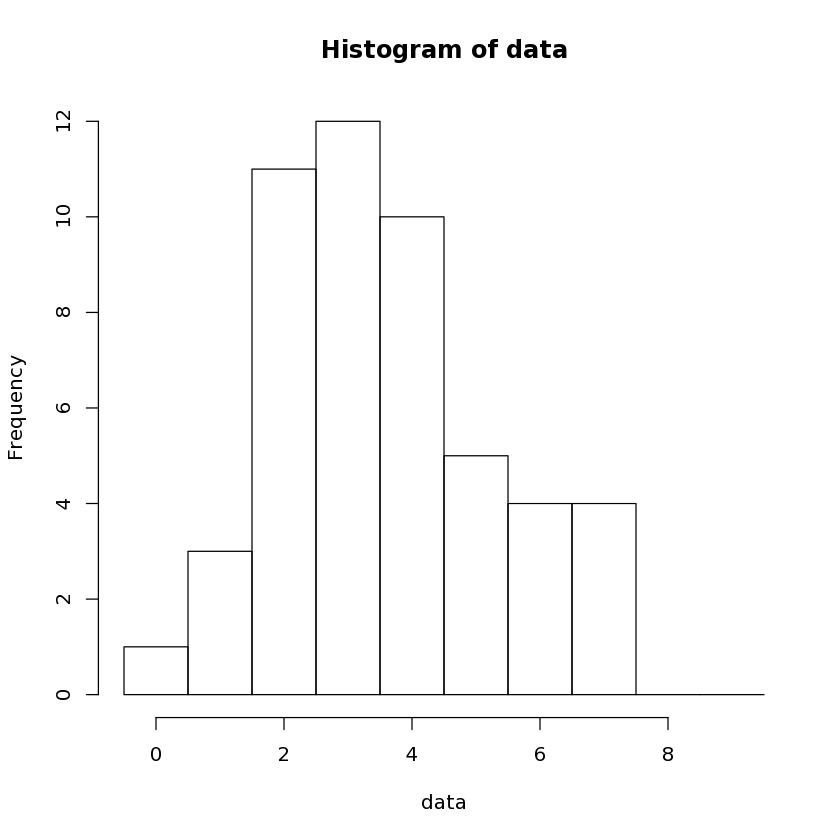

In [7]:
hist(data, breaks = seq(-0.5, 9.5, 1))

In [8]:
var(data)

[1] 2.986122

In [9]:
sqrt(var(data))

[1] 1.72804

In [10]:
sd(data)

[1] 1.72804

# ポアソン分布 

In [11]:
y <- 0:9

In [12]:
y

[1] 0 1 2 3 4 5 6 7 8 9

In [13]:
prob <- dpois(y, lambda = 3.56)

In [14]:
prob

[1] 0.02843882 0.10124222 0.18021114 0.21385056 0.19032700 0.13551282
 [7] 0.08040427 0.04089132 0.01819664 0.00719778

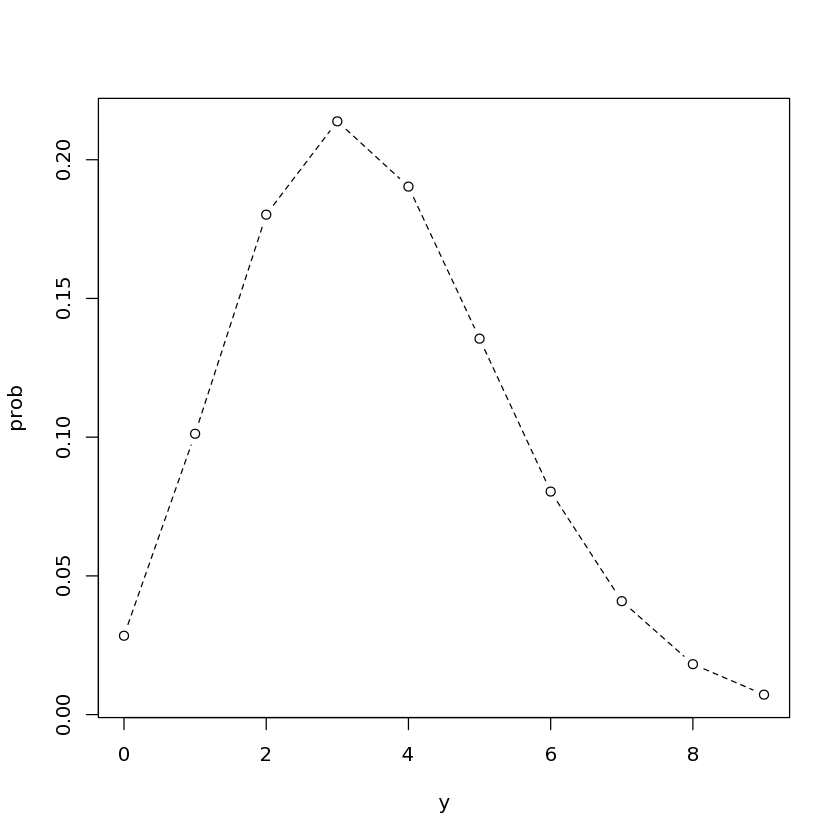

In [15]:
plot(y, prob, type = "b", lty = 2)

In [17]:
cbind(y, prob)

y,prob
0,0.02843882
1,0.10124222
2,0.18021114
3,0.21385056
4,0.19032700
5,0.13551282
6,0.08040427
7,0.04089132
8,0.01819664
9,0.00719778


# データとポアソン分布 

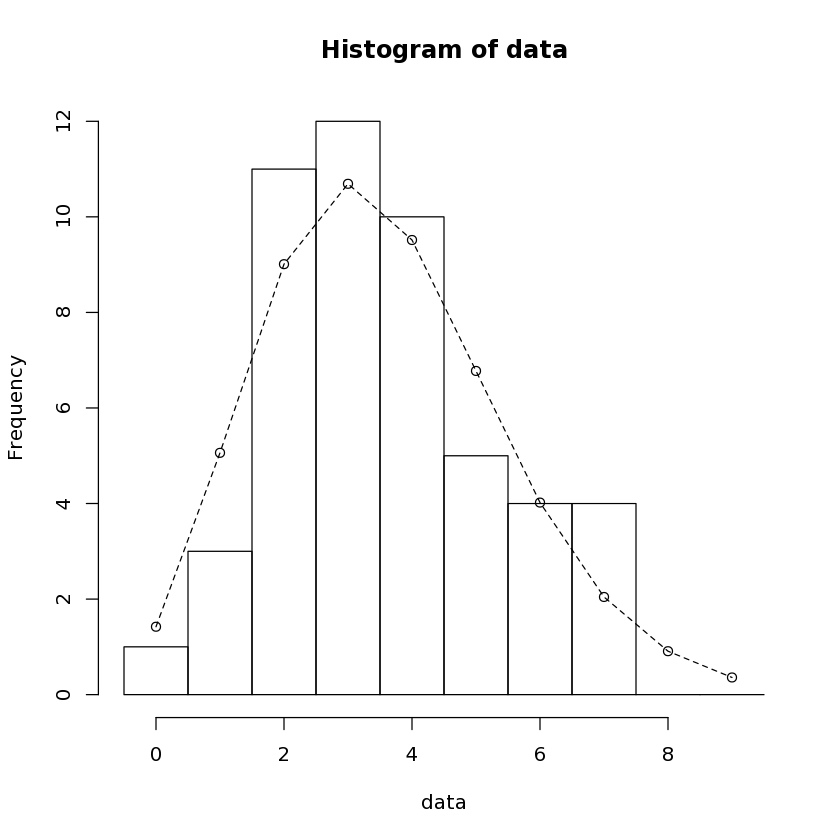

In [18]:
hist(data, breaks = seq(-0.5, 9.5, 1))
points(y, prob * 50)
lines(y, prob * 50, lty = 2)

# $\lambda$の値を変えた時、最尤推定

In [19]:
logL <- function(m) sum(dpois(data, m, log = TRUE))

In [20]:
plot.poisson <- function(lambda) {
    y <- 0:9
    prob <- dpois(y, lambda = lambda)

    hist(data, breaks = seq(-0.5, 9.5, 1), ylim = c(0, 15),
         main = "", xlab = "", ylab = "")
    points(y, prob * 50)
    lines(y,  prob * 50, lty = 2)

    title(sprintf("lambda= %.1f\n logL= %.1f", lambda, logL(lambda)))
}

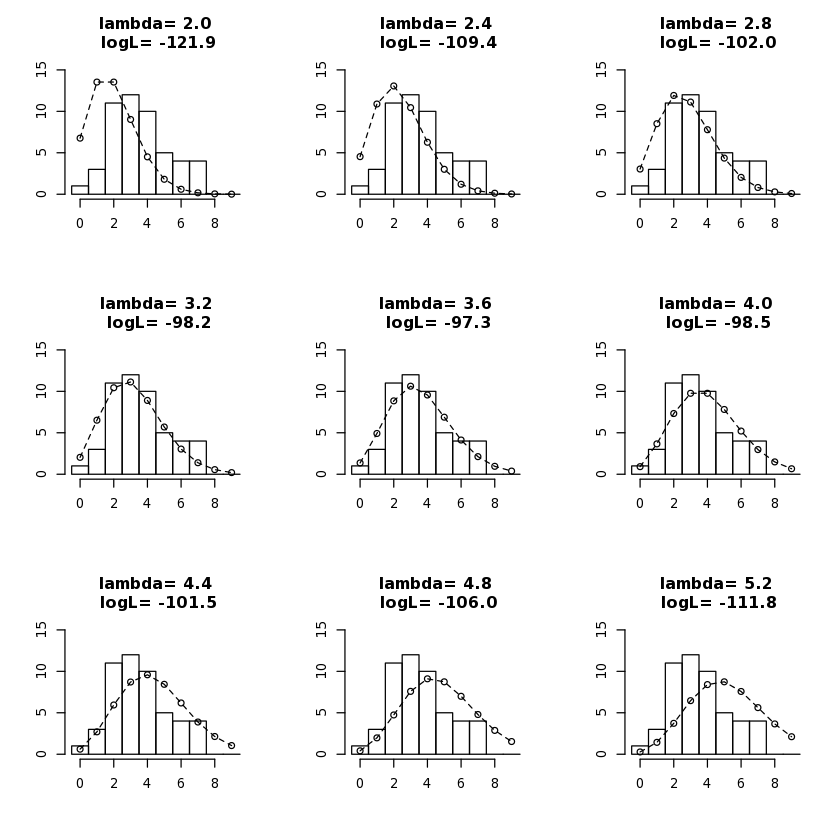

In [21]:
layout(matrix(1:9, byrow = T, ncol = 3))
junk <- sapply(seq(2, 5.2, 0.4), plot.poisson)

In [22]:
x <- seq(2,5,0.1)

In [23]:
y <- sapply(x, logL)

In [24]:
y

[1] -121.88118 -118.19653 -114.91597 -112.00356 -109.42794 -107.16163
 [7] -105.18034 -103.46256 -101.98912 -100.74287  -99.70839  -98.87180
[13]  -98.22054  -97.74318  -97.42935  -97.26957  -97.25516  -97.37814
[19]  -97.63119  -98.00755  -98.50098  -99.10570  -99.81633 -100.62791
[25] -101.53577 -102.53560 -103.62336 -104.79525 -106.04775 -107.37751
[31] -108.78143

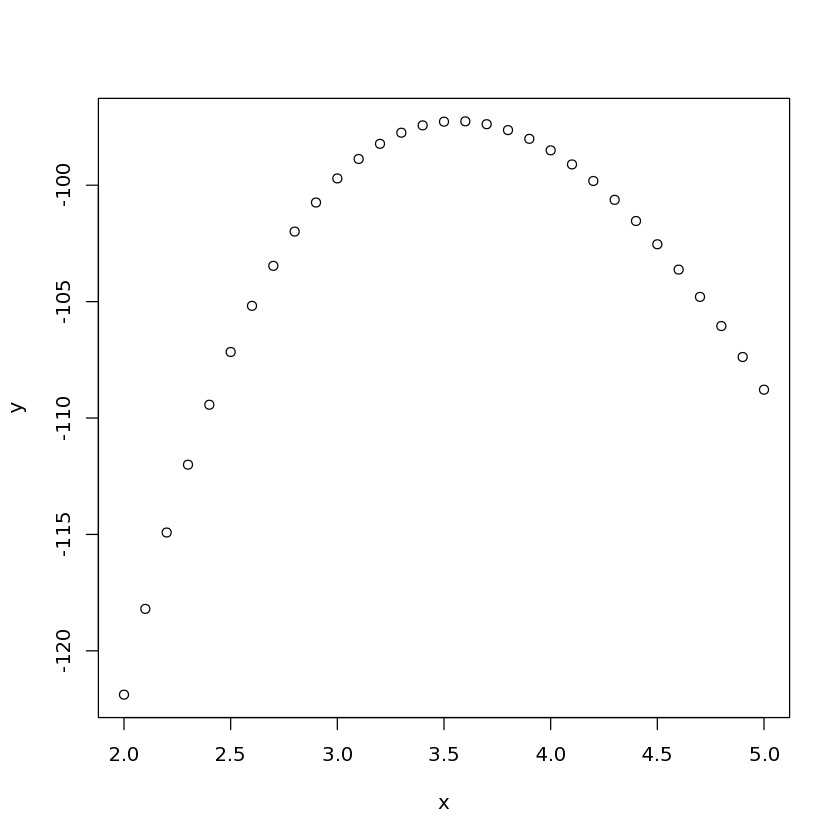

In [25]:
plot(x,y)

# 乱数生成 

set.seedすると同じ乱数が生成される

In [26]:
set.seed(3)
rpois(50, 3.5)

[1] 2 5 3 3 4 4 1 2 4 4 3 3 3 4 6 5 1 4 6 2 2 0 1 1 2 5 4 6 4 5 3 3 2 3 2 3 6 2
[39] 4 2 2 5 2 4 3 2 1 1 2 5

In [27]:
set.seed(3)
rpois(50, 3.5)

[1] 2 5 3 3 4 4 1 2 4 4 3 3 3 4 6 5 1 4 6 2 2 0 1 1 2 5 4 6 4 5 3 3 2 3 2 3 6 2
[39] 4 2 2 5 2 4 3 2 1 1 2 5

In [28]:
rpois(50, 3.5)

[1] 2 2 6 9 5 6 3 2 1 2 5 1 5 1 5 2 5 4 3 1 5 5 6 7 3 4 2 2 5 5 5 4 3 0 7 5 2 3
[39] 4 6 0 2 3 5 6 2 3 2 2 4

In [29]:
rpois(50, 3.5)

[1] 5 4 2 4 4 3 1 3 1 2 3 1 2 2 6 4 5 4 2 3 4 5 5 2 4 3 4 3 6 2 2 3 3 2 5 4 1 1
[39] 4 4 3 2 4 6 5 2 4 5 4 2

# 中心極限定理をやってみる

みどりぼんに関係ないが、中心極限の定理を確認してみる

In [38]:
#母集団の数
N <- 3000
#標本数
sample_num <- 50

In [31]:
#母集団生成
data_master <- rpois(N, 3.5)

In [40]:
mean_lambda <- mean(data_master)
var_lambda <- var(data_master)

#プロットの幅とプロットレンジ
plt_step <- 0.1
plt_point <- seq(2, 5, plt_step)

標本平均の分布は$N(\bar{\lambda}, \sigma(\lambda))$に従うはず

In [47]:
#繰り返し回数を指定して、乱数生成して標本抽出し、平均の分布をプロットする
plot <- function(repeat_num){
    lambda <- c()
    for (i in 1:repeat_num){
        index <- floor(runif(sample_num, min=1, max=N+1))
        data <- data_master[index]
        lambda <- c(lambda, mean(data))
    }
    hist(lambda, main=sprintf("repeat= %.1f var*sample_num= %.3f mean=%.2f", 
                              repeat_num, 
                              var(lambda)*sample_num, 
                              mean(lambda)), 
         plt_point)
    prob <- dnorm(plt_point, mean=mean_lambda, sd= sqrt(var_lambda/sample_num))*repeat_num*plt_step
    points(plt_point, prob)
    lines(plt_point,  prob, lty = 2)
}


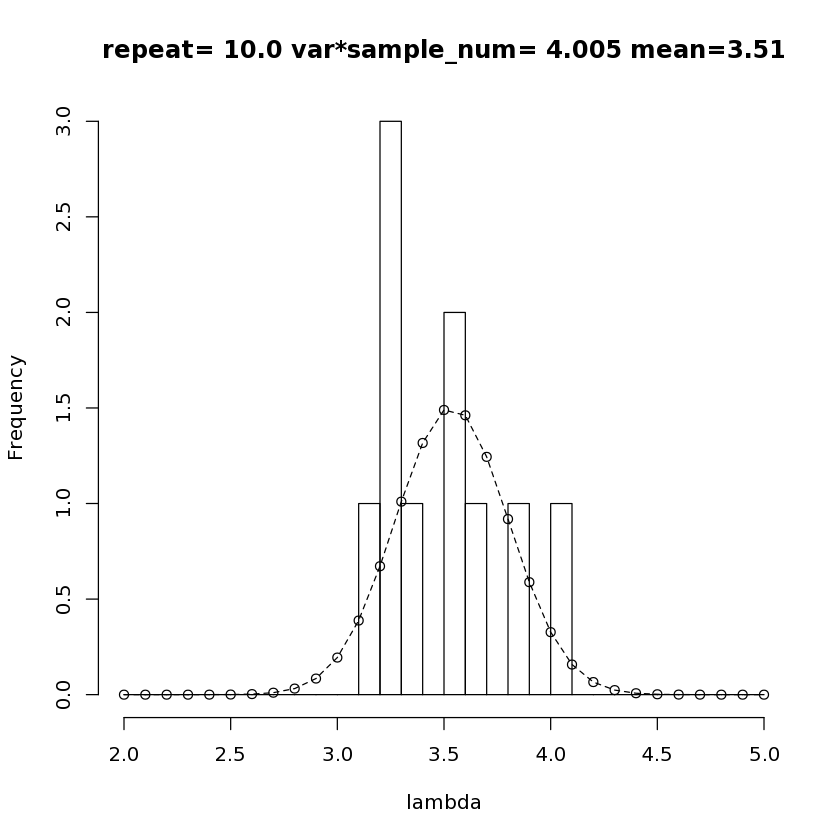

In [48]:
plot(10)

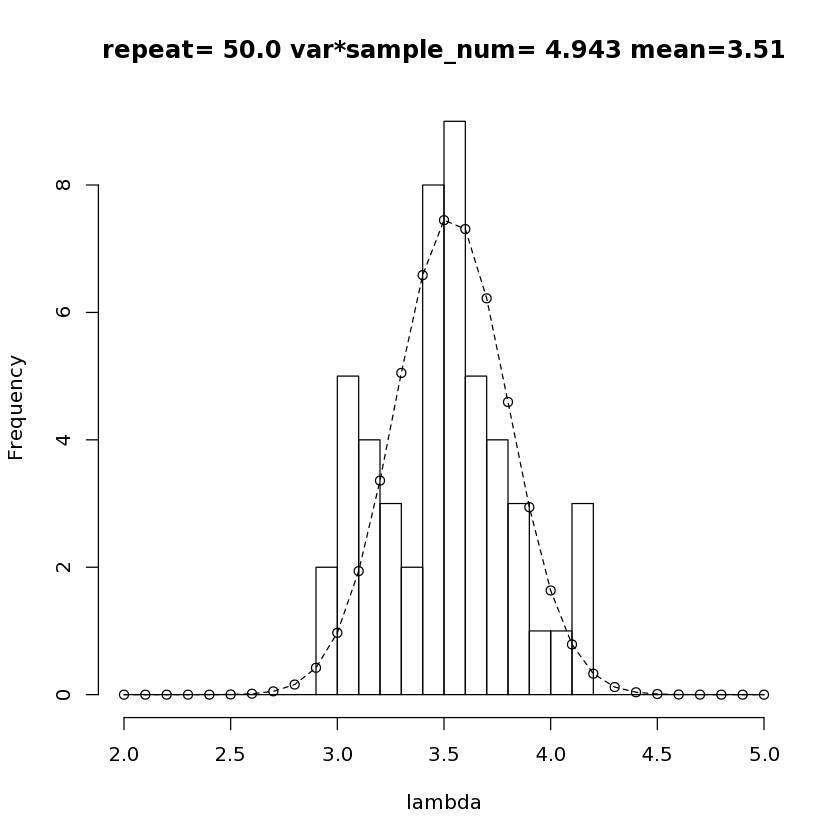

In [49]:
plot(50)

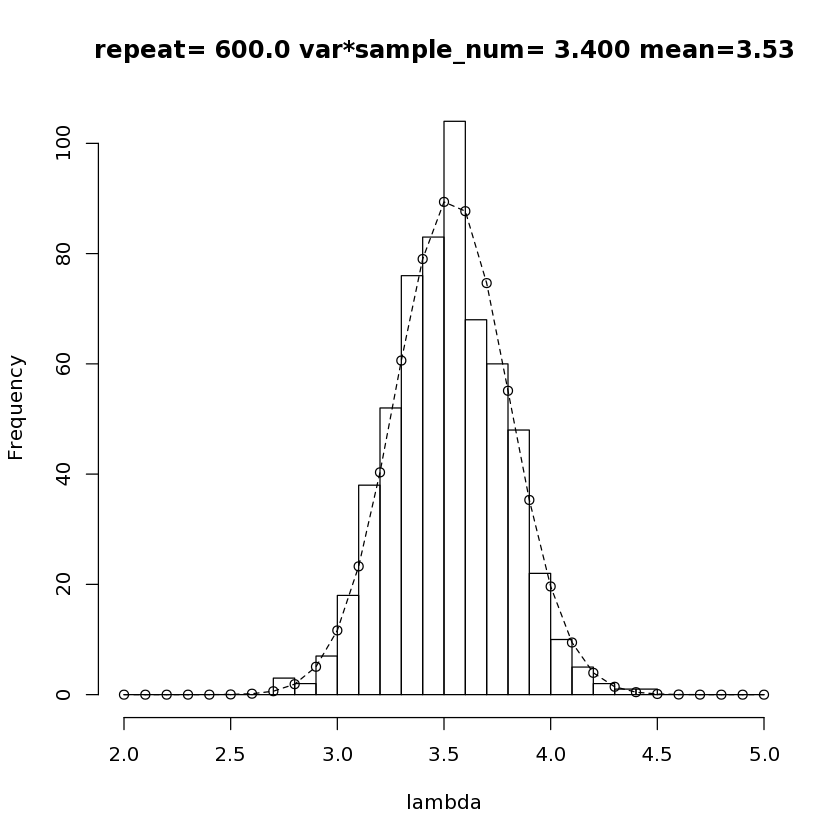

In [50]:
plot(600)

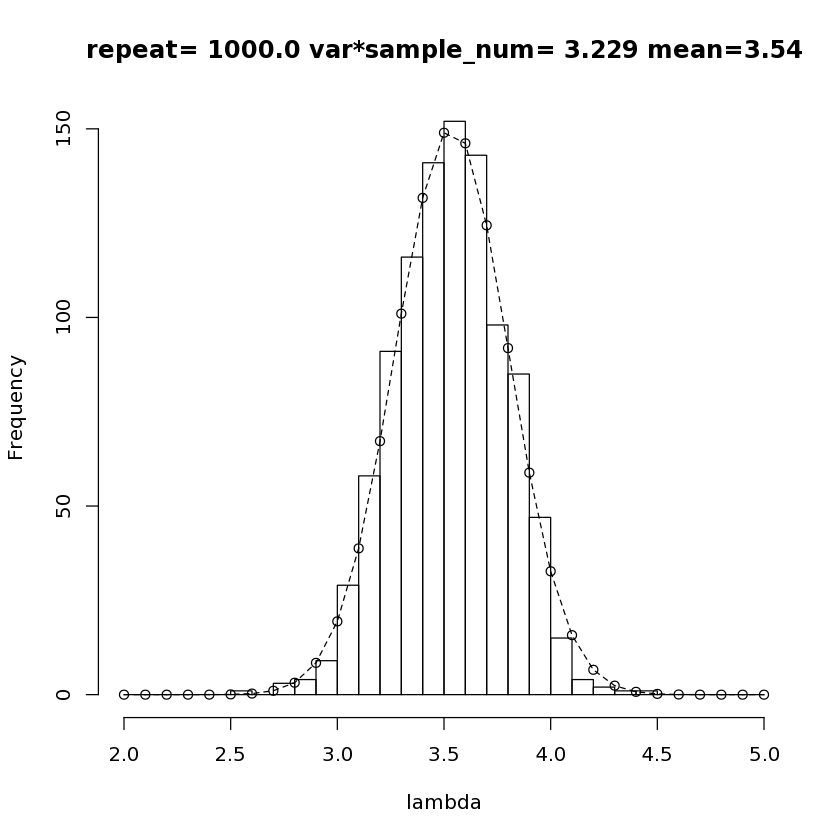

In [51]:
plot(1000)